In [1]:
import pandas as pd 
import numpy as np
import f 
from Dora import Dora 
from matplotlib import pyplot
import math
import random
from matplotlib.patches import Rectangle
from types import MethodType
import matplotlib.dates as mdates
import datetime

In [2]:
from sklearn import linear_model
model = linear_model.LinearRegression()

In [3]:
df = pd.read_excel('spread.xlsx', index_col=(0))
df.rename(columns={'rfq':'volume'}, inplace=True)
df.spread = df.iloc[::-1].rolling(40).apply(lambda x: pd.np.sum(x))['spread'][::-1]
df.volume = df.rolling(40).apply(lambda x: pd.np.sum(x))['volume']
df.dropna(inplace=True)
dora = Dora(output = 'spread', data = df)

def new_set_training_and_validation(self):
    training_rows = np.arange(0,len(self.data))/len(self.data) < 0.8
    a = np.random.randint(0,len(self.data))
    training_rows = list(training_rows[a:]) + list(training_rows[:a])
    training_rows = np.array(training_rows)
    self.training_data = self.data[training_rows]
    self.validation_data = self.data[~training_rows]

dora.set_training_and_validation = MethodType(new_set_training_and_validation, dora)

#for i in range(dora.data.shape[0]):
#    dora.data['volume'].iloc[i] = random.randint(-10,10)
dora.snapshot('transform1')
dora.data

<ipython-input-3-23db3ce10805>:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df.spread = df.iloc[::-1].rolling(40).apply(lambda x: pd.np.sum(x))['spread'][::-1]
<ipython-input-3-23db3ce10805>:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df.volume = df.rolling(40).apply(lambda x: pd.np.sum(x))['volume']


,spread,volume
2017-03-01,-2.446667,5298000.0
2017-03-02,-2.836840,4457500.0
2017-03-03,-2.278893,2132500.0
2017-03-06,-2.368633,1604500.0
2017-03-07,-2.737996,3429500.0
...,...,...
2022-01-24,4.017194,5955000.0
2022-01-25,3.781790,3330000.0
2022-01-26,3.210837,-20000.0
2022-01-27,3.918350,-220000.0


<ipython-input-4-396155b3e534>:12: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  dff.volumecum = dff.volume.cumsum()
<ipython-input-4-396155b3e534>:13: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  dff.spreadcum = dff.spread.cumsum()


<AxesSubplot:label='071376fc-8715-4889-988c-57ae9fa5e5c7'>

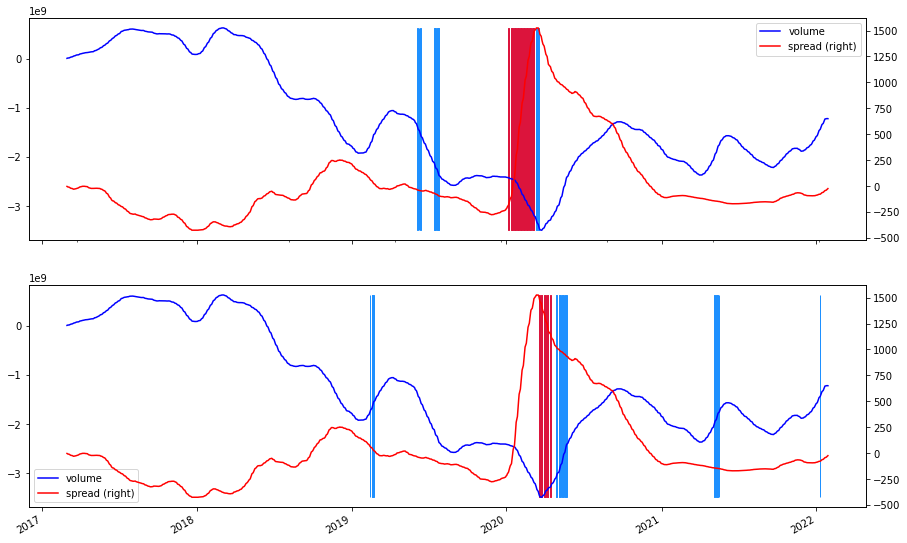

In [4]:
dff = df.copy()
deb = 0
leng = 3000
deb_df = 12266

mean_sp = df.spread.mean()
sigma_sp = df.spread.std()
mean_vol = df.volume.mean()
sigma_vol = df.volume.std()

dff = dff.iloc[deb:deb+leng,:]
dff.volumecum = dff.volume.cumsum()
dff.spreadcum = dff.spread.cumsum()
minn = dff.volumecum.min()
height = dff.volumecum.max() - minn

tresh = 2

fig, axs = pyplot.subplots(2)

for i in dff.index:
    
    startTime = i - datetime.timedelta(days = 1)
    endTime = startTime + datetime.timedelta(days = 1)
    start = mdates.date2num(startTime)
    end = mdates.date2num(endTime)
    width = end - start
    
    if dff.spread[i] > mean_sp + tresh*sigma_sp:
        if dff.volume[i] < mean_vol - tresh*sigma_vol:
            axs[0].add_patch(Rectangle((start,minn), width, height,color="purple"))
        else:
            axs[0].add_patch(Rectangle((start,minn), width, height,color="crimson"))
    else:
        if dff.volume[i] < mean_vol - tresh*sigma_vol:
            axs[0].add_patch(Rectangle((start,minn), width, height,color="dodgerblue"))
        
    if dff.spread[i] < mean_sp - tresh*sigma_sp:
        if dff.volume[i] > mean_vol + tresh*sigma_vol:
            axs[1].add_patch(Rectangle((start,minn), width, height,color="purple"))
        else:
            axs[1].add_patch(Rectangle((start,minn), width, height,color="crimson"))
    else:
        if dff.volume[i] > mean_vol + tresh*sigma_vol:
            axs[1].add_patch(Rectangle((start,minn), width, height,color="dodgerblue"))
            
locator = mdates.AutoDateLocator(minticks=3)
formatter = mdates.AutoDateFormatter(locator)
axs[0].xaxis.set_major_locator(locator)
axs[0].xaxis.set_major_formatter(formatter)
axs[1].xaxis.set_major_locator(locator)
axs[1].xaxis.set_major_formatter(formatter)

fig.set_figheight(10)
fig.set_figwidth(15)
dff.volumecum.plot(style = 'b', legend = 'eee', ax = axs[0])
dff.spreadcum.plot(secondary_y=True, style='red', legend = 'eee', ax = axs[0])
dff.volumecum.plot(style = 'b', legend = 'eee', ax = axs[1])
dff.spreadcum.plot(secondary_y=True, style='red', legend = 'eee', ax = axs[1])

C:\Users\ut34u3\My_IT_Applications\Anaconda\lib\site-packages\Dora\main.py:80: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


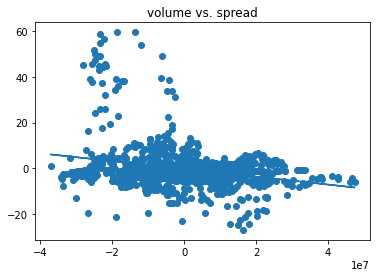

In [5]:
dora.plot_feature('volume')

In [6]:
dora.scale_input_values()
flow_roll_level = [5, 10, 15, 30, 60, 90, 120, 150, 200, 250, 300, 350, 400]
flow_roll_level = [5, 10, 60, 250]
for i in flow_roll_level:
    dora.data['flow_roll_mean_'+str(i)] = dora.data.rolling(i).mean()['volume']
    dora.data['flow_roll_var_'+str(i)] = dora.data.rolling(i).apply(lambda x: pd.np.std(x))['volume']
    dora.data['flow_Z_score_'+str(i)] = (dora.data['volume']-dora.data['flow_roll_mean_'+str(i)])/dora.data['flow_roll_var_'+str(i)]
dora.data.dropna(inplace=True)
dora.data

<ipython-input-6-9f046c8c8b40>:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  dora.data['flow_roll_var_'+str(i)] = dora.data.rolling(i).apply(lambda x: pd.np.std(x))['volume']


,spread,volume,flow_roll_mean_5,flow_roll_var_5,flow_Z_score_5,flow_roll_mean_10,flow_roll_var_10,flow_Z_score_10,flow_roll_mean_60,flow_roll_var_60,flow_Z_score_60,flow_roll_mean_250,flow_roll_var_250,flow_Z_score_250
2018-02-26,-3.314151,0.309886,0.531384,0.169438,-1.307249,0.705173,0.219771,-1.798634,0.369647,0.973226,-0.061405,0.241539,0.582511,0.117331
2018-02-27,-3.054036,0.361754,0.440506,0.099939,-0.788003,0.638621,0.212812,-1.300997,0.392531,0.956486,-0.032177,0.241219,0.582423,0.206954
2018-02-28,-2.133229,0.273501,0.407260,0.120252,-1.112324,0.576834,0.220031,-1.378589,0.414208,0.938638,-0.149905,0.240783,0.582358,0.056182
2018-03-01,-2.458372,0.210161,0.330591,0.097028,-1.241187,0.508923,0.217911,-1.371023,0.434952,0.919960,-0.244348,0.240748,0.582359,-0.052522
2018-03-02,-2.669066,0.099845,0.251029,0.090284,-1.674545,0.437927,0.223889,-1.510044,0.455312,0.898551,-0.395600,0.240420,0.582415,-0.241366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-24,4.017194,0.487940,1.410163,0.462534,-1.993848,1.576587,0.372977,-2.918804,0.835226,0.745705,-0.465714,0.306259,0.925387,0.196330
2022-01-25,3.781790,0.303200,1.129935,0.602640,-1.371855,1.422415,0.519899,-2.152758,0.826848,0.748805,-0.699312,0.308758,0.924532,-0.006011
2022-01-26,3.210837,0.067436,0.815152,0.661482,-1.130364,1.242380,0.633753,-1.853946,0.814835,0.755084,-0.989822,0.309960,0.924021,-0.262466
2022-01-27,3.918350,0.053361,0.501080,0.569407,-0.786289,1.082015,0.707185,-1.454576,0.802411,0.761352,-0.983842,0.310702,0.923740,-0.278586


In [7]:
dora.snapshot('transform2')

In [8]:
dora.use_snapshot('transform2')

In [9]:
dora.snapshot('transform3')

In [10]:
dora.use_snapshot('transform3')

In [11]:
#for i in range(dora.data.shape[1]):
#    dora.plot_feature(dora.data.columns[i])

{'volume': -13.519853481916066, 'flow_roll_mean_5': 6.9099437844147085, 'flow_roll_var_5': 2.159306795608427, 'flow_Z_score_5': -0.4792617213175731, 'flow_roll_mean_10': 5.037947912957421, 'flow_roll_var_10': -1.6955192604955618, 'flow_Z_score_10': 2.581580291476661, 'flow_roll_mean_60': -2.0080723313080826, 'flow_roll_var_60': -4.450828904403353, 'flow_Z_score_60': -2.8253744720679896, 'flow_roll_mean_250': -0.1430104574098257, 'flow_roll_var_250': -8.21811543310046, 'flow_Z_score_250': 2.5845188816778903}


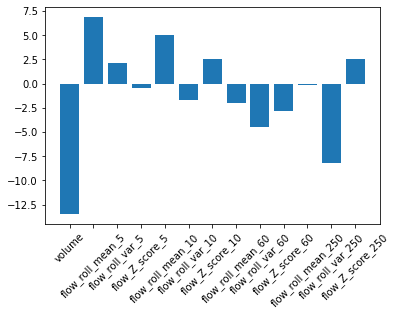

-6.021409400785491


In [12]:
l = []
imp = {}
for i in range(1000):
    dora.set_training_and_validation()
    X = dora.training_data[dora.input_columns()]
    y = dora.training_data[dora.output]
    reg = model
    reg.fit(X, y)
    X = dora.validation_data[dora.input_columns()]
    y = dora.validation_data[dora.output]
    l.append(reg.score(X,y))
    importance = reg.coef_
    imp
    for j,v in enumerate(importance):
        if i == 0:
            imp[dora.input_columns()[j]] = [v]
        else:
            imp[dora.input_columns()[j]].append(v)

for key in imp:
    imp[key] = np.mean(imp[key])  
    
print(imp)
pyplot.bar(imp.keys(), imp.values())
pyplot.xticks(rotation = 45)
pyplot.show()

print(np.mean(l))

In [13]:
for key in imp:
    imp[key] = abs(imp[key])

imp = {k: v for k, v in sorted(imp.items(), key=lambda item: item[1])}
imp
for i in list(imp.keys())[0:5]:
    dora.remove_feature(i)

{'volume': -16.49741646117115, 'flow_roll_mean_5': 8.86410442820615, 'flow_roll_mean_10': 3.7930341939060765, 'flow_Z_score_10': 2.2022790520776403, 'flow_roll_var_60': -4.100159948726336, 'flow_Z_score_60': -1.9729113428687275, 'flow_roll_var_250': -8.453543763319024, 'flow_Z_score_250': 3.6392756267698094}


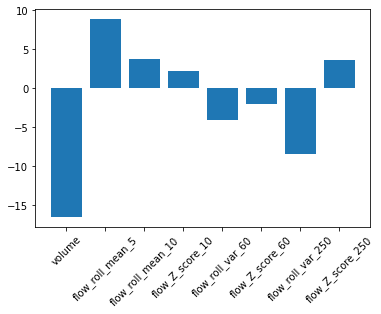

-3.7563872480525804


In [14]:
l = []
imp = {}
for i in range(1000):
    dora.set_training_and_validation()
    X = dora.training_data[dora.input_columns()]
    y = dora.training_data[dora.output]
    reg = model
    reg.fit(X, y)
    X = dora.validation_data[dora.input_columns()]
    y = dora.validation_data[dora.output]
    l.append(reg.score(X,y))
    importance = reg.coef_
    imp
    for j,v in enumerate(importance):
        if i == 0:
            imp[dora.input_columns()[j]] = [v]
        else:
            imp[dora.input_columns()[j]].append(v)

for key in imp:
    imp[key] = np.mean(imp[key])  
    
print(imp)
pyplot.bar(imp.keys(), imp.values())
pyplot.xticks(rotation = 45)
pyplot.show()

print(np.mean(l))

In [15]:
for key in imp:
    imp[key] = abs(imp[key])

imp = {k: v for k, v in sorted(imp.items(), key=lambda item: item[1])}
imp
for i in list(imp.keys())[0:4]:
    dora.remove_feature(i)

{'volume': -8.186082542615814, 'flow_roll_mean_5': 6.277729947309715, 'flow_roll_var_60': -2.9673641077728234, 'flow_roll_var_250': -6.176919286189181}


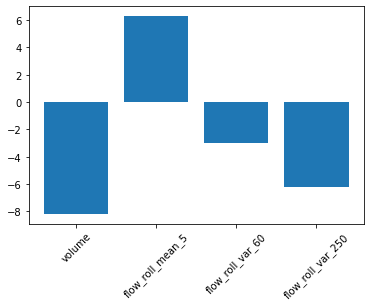

-1.9444193559686007


In [16]:
l = []
imp = {}
for i in range(1000):
    dora.set_training_and_validation()
    X = dora.training_data[dora.input_columns()]
    y = dora.training_data[dora.output]
    reg = model
    reg.fit(X, y)
    X = dora.validation_data[dora.input_columns()]
    y = dora.validation_data[dora.output]
    l.append(reg.score(X,y))
    importance = reg.coef_
    imp
    for j,v in enumerate(importance):
        if i == 0:
            imp[dora.input_columns()[j]] = [v]
        else:
            imp[dora.input_columns()[j]].append(v)

for key in imp:
    imp[key] = np.mean(imp[key])  
    
print(imp)
pyplot.bar(imp.keys(), imp.values())
pyplot.xticks(rotation = 45)
pyplot.show()

print(np.mean(l))

In [17]:
for key in imp:
    imp[key] = abs(imp[key])

imp = {k: v for k, v in sorted(imp.items(), key=lambda item: item[1])}
imp
for i in list(imp.keys())[0:2]:
    dora.remove_feature(i)

{'volume': -7.752833908488291, 'flow_roll_mean_5': 5.292369651902632}


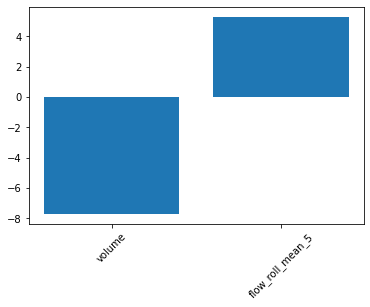

-1.8068908277820492


In [18]:
l = []
imp = {}
for i in range(1000):
    dora.set_training_and_validation()
    X = dora.training_data[dora.input_columns()]
    y = dora.training_data[dora.output]
    reg = model
    reg.fit(X, y)
    X = dora.validation_data[dora.input_columns()]
    y = dora.validation_data[dora.output]
    l.append(reg.score(X,y))
    importance = reg.coef_
    imp
    for j,v in enumerate(importance):
        if i == 0:
            imp[dora.input_columns()[j]] = [v]
        else:
            imp[dora.input_columns()[j]].append(v)

for key in imp:
    imp[key] = np.mean(imp[key])  
    
print(imp)
pyplot.bar(imp.keys(), imp.values())
pyplot.xticks(rotation = 45)
pyplot.show()

print(np.mean(l))

In [19]:
for key in imp:
    imp[key] = abs(imp[key])

imp = {k: v for k, v in sorted(imp.items(), key=lambda item: item[1])}
imp
for i in list(imp.keys())[0:1]:
    dora.remove_feature(i)

{'volume': -2.717900274289231}


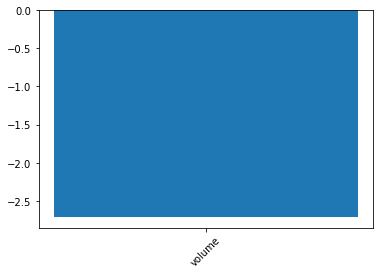

-1.8012337411007584


In [20]:
l = []
imp = {}
for i in range(1000):
    dora.set_training_and_validation()
    X = dora.training_data[dora.input_columns()]
    y = dora.training_data[dora.output]
    reg = model
    reg.fit(X, y)
    X = dora.validation_data[dora.input_columns()]
    y = dora.validation_data[dora.output]
    l.append(reg.score(X,y))
    importance = reg.coef_
    imp
    for j,v in enumerate(importance):
        if i == 0:
            imp[dora.input_columns()[j]] = [v]
        else:
            imp[dora.input_columns()[j]].append(v)

for key in imp:
    imp[key] = np.mean(imp[key])  
    
print(imp)
pyplot.bar(imp.keys(), imp.values())
pyplot.xticks(rotation = 45)
pyplot.show()

print(np.mean(l))

In [21]:
for key in imp:
    imp[key] = abs(imp[key])

imp = {k: v for k, v in sorted(imp.items(), key=lambda item: item[1])}
imp
for i in list(imp.keys())[0:5]:
    dora.remove_feature(i)

In [22]:
l = []
imp = {}
for i in range(1000):
    dora.set_training_and_validation()
    X = dora.training_data[dora.input_columns()]
    y = dora.training_data[dora.output]
    reg = model
    reg.fit(X, y)
    X = dora.validation_data[dora.input_columns()]
    y = dora.validation_data[dora.output]
    l.append(reg.score(X,y))
    importance = reg.coef_
    imp
    for j,v in enumerate(importance):
        if i == 0:
            imp[dora.input_columns()[j]] = [v]
        else:
            imp[dora.input_columns()[j]].append(v)

for key in imp:
    imp[key] = np.mean(imp[key])  
    
print(imp)
pyplot.bar(imp.keys(), imp.values())
pyplot.xticks(rotation = 45)
pyplot.show()

print(np.mean(l))

ValueError: at least one array or dtype is required

In [ ]:
for key in imp:
    imp[key] = abs(imp[key])

imp = {k: v for k, v in sorted(imp.items(), key=lambda item: item[1])}
imp
for i in list(imp.keys())[0:3]:
    dora.remove_feature(i)

In [ ]:
l = []
imp = {}
for i in range(1000):
    dora.set_training_and_validation()
    X = dora.training_data[dora.input_columns()]
    y = dora.training_data[dora.output]
    reg = model
    reg.fit(X, y)
    X = dora.validation_data[dora.input_columns()]
    y = dora.validation_data[dora.output]
    l.append(reg.score(X,y))
    importance = reg.coef_
    imp
    for j,v in enumerate(importance):
        if i == 0:
            imp[dora.input_columns()[j]] = [v]
        else:
            imp[dora.input_columns()[j]].append(v)

for key in imp:
    imp[key] = np.mean(imp[key])  
    
print(imp)
pyplot.bar(imp.keys(), imp.values())
pyplot.xticks(rotation = 45)
pyplot.show()

print(np.mean(l))

In [ ]:
for key in imp:
    imp[key] = abs(imp[key])

imp = {k: v for k, v in sorted(imp.items(), key=lambda item: item[1])}
imp
for i in list(imp.keys())[0:3]:
    dora.remove_feature(i)

In [ ]:
l = []
imp = {}
for i in range(1000):
    dora.set_training_and_validation()
    X = dora.training_data[dora.input_columns()]
    y = dora.training_data[dora.output]
    reg = model
    reg.fit(X, y)
    X = dora.validation_data[dora.input_columns()]
    y = dora.validation_data[dora.output]
    l.append(reg.score(X,y))
    importance = reg.coef_
    imp
    for j,v in enumerate(importance):
        if i == 0:
            imp[dora.input_columns()[j]] = [v]
        else:
            imp[dora.input_columns()[j]].append(v)

for key in imp:
    imp[key] = np.mean(imp[key])  
    
print(imp)
pyplot.bar(imp.keys(), imp.values())
pyplot.xticks(rotation = 45)
pyplot.show()

print(np.mean(l))

In [ ]:
for key in imp:
    imp[key] = abs(imp[key])

imp = {k: v for k, v in sorted(imp.items(), key=lambda item: item[1])}
imp
for i in list(imp.keys())[0:3]:
    dora.remove_feature(i)

In [ ]:
l = []
imp = {}
for i in range(1000):
    dora.set_training_and_validation()
    X = dora.training_data[dora.input_columns()]
    y = dora.training_data[dora.output]
    reg = model
    reg.fit(X, y)
    X = dora.validation_data[dora.input_columns()]
    y = dora.validation_data[dora.output]
    l.append(reg.score(X,y))
    importance = reg.coef_
    imp
    for j,v in enumerate(importance):
        if i == 0:
            imp[dora.input_columns()[j]] = [v]
        else:
            imp[dora.input_columns()[j]].append(v)

for key in imp:
    imp[key] = np.mean(imp[key])  
    
print(imp)
pyplot.bar(imp.keys(), imp.values())
pyplot.xticks(rotation = 45)
pyplot.show()

print(np.mean(l))

In [ ]:
for key in imp:
    imp[key] = abs(imp[key])

imp = {k: v for k, v in sorted(imp.items(), key=lambda item: item[1])}
imp
for i in list(imp.keys())[0:5]:
    dora.remove_feature(i)

In [ ]:
l = []
imp = {}
for i in range(1000):
    dora.set_training_and_validation()
    X = dora.training_data[dora.input_columns()]
    y = dora.training_data[dora.output]
    reg = model
    reg.fit(X, y)
    X = dora.validation_data[dora.input_columns()]
    y = dora.validation_data[dora.output]
    l.append(reg.score(X,y))
    importance = reg.coef_
    imp
    for j,v in enumerate(importance):
        if i == 0:
            imp[dora.input_columns()[j]] = [v]
        else:
            imp[dora.input_columns()[j]].append(v)

for key in imp:
    imp[key] = np.mean(imp[key])  
    
print(imp)
pyplot.bar(imp.keys(), imp.values())
pyplot.xticks(rotation = 45)
pyplot.show()

print(np.mean(l))

In [ ]:
for key in imp:
    imp[key] = abs(imp[key])

imp = {k: v for k, v in sorted(imp.items(), key=lambda item: item[1])}
imp
for i in list(imp.keys())[0:1]:
    dora.remove_feature(i)

In [ ]:
l = []
imp = {}
for i in range(1000):
    dora.set_training_and_validation()
    X = dora.training_data[dora.input_columns()]
    y = dora.training_data[dora.output]
    reg = model
    reg.fit(X, y)
    X = dora.validation_data[dora.input_columns()]
    y = dora.validation_data[dora.output]
    l.append(reg.score(X,y))
    importance = reg.coef_
    imp
    for j,v in enumerate(importance):
        if i == 0:
            imp[dora.input_columns()[j]] = [v]
        else:
            imp[dora.input_columns()[j]].append(v)

for key in imp:
    imp[key] = np.mean(imp[key])  
    
print(imp)
pyplot.bar(imp.keys(), imp.values())
pyplot.xticks(rotation = 45)
pyplot.show()

print(np.mean(l))

In [ ]:
df = pd.read_excel('spread.xlsx', index_col=(0))
df.rename(columns={'rfq':'volume'}, inplace=True)
df.spread = df.iloc[::-1].rolling(5).apply(lambda x: pd.np.sum(x))['spread'][::-1]
df.volume = df.rolling(5).apply(lambda x: pd.np.sum(x))['volume']
df.dropna(inplace=True)
dora = Dora(output = 'spread', data = df)

def new_set_training_and_validation(self):
    training_rows = np.arange(0,len(self.data))/len(self.data) < 0.8
    a = np.random.randint(0,len(self.data))
    training_rows = list(training_rows[a:]) + list(training_rows[:a])
    training_rows = np.array(training_rows)
    self.training_data = self.data[training_rows]
    self.validation_data = self.data[~training_rows]

dora.set_training_and_validation = MethodType(new_set_training_and_validation, dora)

#for i in range(dora.data.shape[0]):
#    dora.data['volume'].iloc[i] = random.randint(-10,10)
dora.snapshot('transform1')
dora.data

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

dora.set_training_and_validation()
X = dora.training_data[dora.input_columns()]
y = dora.training_data[dora.output]
reg = model
reg.fit(X, y)
Xt = dora.validation_data[dora.input_columns()]
yt = dora.validation_data[dora.output]

yp = reg.predict(Xt)

# The coefficients
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(yt, yp))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(yt, yp))

# Plot outputs
plt.scatter(Xt, yt, color="black")
plt.plot(Xt, yp, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()